<a href="https://colab.research.google.com/github/CameliaRegista03/Predictive-Analytics/blob/main/Predictive_Analytics_Harga_Mobil_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA LOAD**

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Membaca dataset 
df = pd.read_csv('bmw.csv')

#Tampilkan 5 data teratas pada dataset ini
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
#Tampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


# **DATA CLEANING**

In [ ]:
#Apakah terdapat missing value ?
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [ ]:
#Bagaimana Kondisi dimensi data dalam dataset ?
df.shape

(10781, 9)

In [ ]:
#Apakah terdapat data duplikat ?
print(df.duplicated().any())

#Tampilkan ada berapa data yang terdeteksi duplikat 
print('Jumlah data duplikat dalam dataset ini ada :', df.duplicated().sum())


True
Jumlah data duplikat dalam dataset ini ada : 117


In [ ]:
#Menghapus data duplikat dalam dataset
df.drop_duplicates(inplace=True)

#Tampilkan data yang sudah di handling data duplikat
df.shape

(10664, 9)

# **DATA PREPARATION**

In [ ]:
#Tampilkan deskripsi statistik data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,10664.0,2017.062828,2.350668,1996.0,2016.00,2017.0,2019.0,2020.0
price,10664.0,22692.888691,11434.921030,1200.0,14897.00,20261.5,27890.0,123456.0
mileage,10664.0,25710.978995,25146.634940,1.0,5665.75,18783.0,38436.5,214000.0
tax,10664.0,131.597431,61.611394,0.0,135.00,145.0,145.0,580.0
mpg,10664.0,56.483121,31.465604,5.5,45.60,53.3,62.8,470.8
engineSize,10664.0,2.170161,0.552556,0.0,2.00,2.0,2.0,6.6


In [ ]:
#Tampilkan deskripsi statistik data kategorik
df.describe(include='object')

,model,transmission,fuelType
count,10664,10664,10664
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2434,4637,6988


In [ ]:
#Feature Engineering : membuat kolom baru bernama age_car untuk mengetahui usia mobil
age_car = []
for i in df['year']:
  age = (2021 - i)
  age_car.append(age)

df['age_car'] = age_car

In [ ]:
#Menampilkan Model mobil
df['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

**Exploratory Data Analysis**

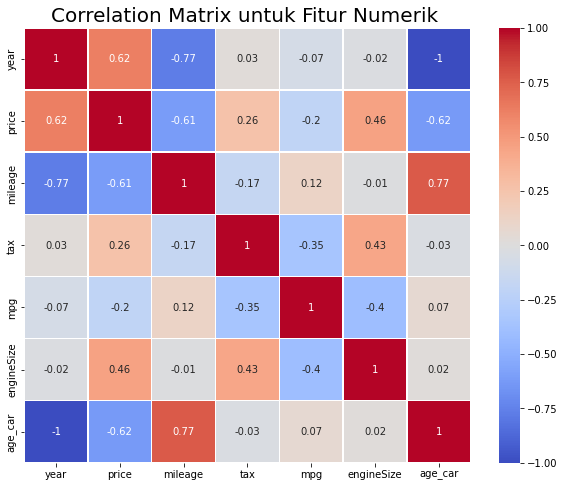

In [ ]:
#Melihat korelasi antar fitur 
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()


In [ ]:
#Melihat korelasi target (price) dengan fitur
df1 = df.corr()
df1['price'].sort_values(ascending = False)

price         1.000000
year          0.623754
engineSize    0.461750
tax           0.264178
mpg          -0.203986
mileage      -0.605473
age_car      -0.623754
Name: price, dtype: float64

In [ ]:
#Melihat nilai keunikan
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [ ]:
#Melihat nilai keunikan
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [ ]:
#Encoding Fitur Kategori
df = pd.get_dummies(df, columns=['transmission','fuelType'], drop_first = True)

In [ ]:
#Ecoding Fitur Categori
df = pd.get_dummies(df, columns=['model'], drop_first = True)

In [ ]:
#Tampilkan data setelah encoding fitur
df

,year,price,mileage,tax,mpg,engineSize,age_car,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8
0,2014,11200,67068,125,57.6,2.0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016,16000,62794,160,51.4,3.0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10777,2016,14600,42947,125,60.1,2.0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10778,2017,13100,25468,200,42.8,2.0,4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10779,2014,9930,45000,30,64.2,2.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Tampilkan variable x
x.head()

,model,transmission,mileage,fuelType,tax,mpg,engineSize,age_car
0,5 Series,Automatic,67068,Diesel,125,57.6,2.0,7
1,6 Series,Automatic,14827,Petrol,145,42.8,2.0,3
2,5 Series,Automatic,62794,Diesel,160,51.4,3.0,5
3,1 Series,Automatic,26676,Diesel,145,72.4,1.5,4
4,7 Series,Automatic,39554,Diesel,160,50.4,3.0,7


In [ ]:
#Memisahkan dataset menjadi kolom x dan y untuk train test split
col_set = ['engineSize', 'year', 'tax', 'mpg', 'mileage']
x = df.drop(columns=['price', 'year'])
y = df['price'] #Target

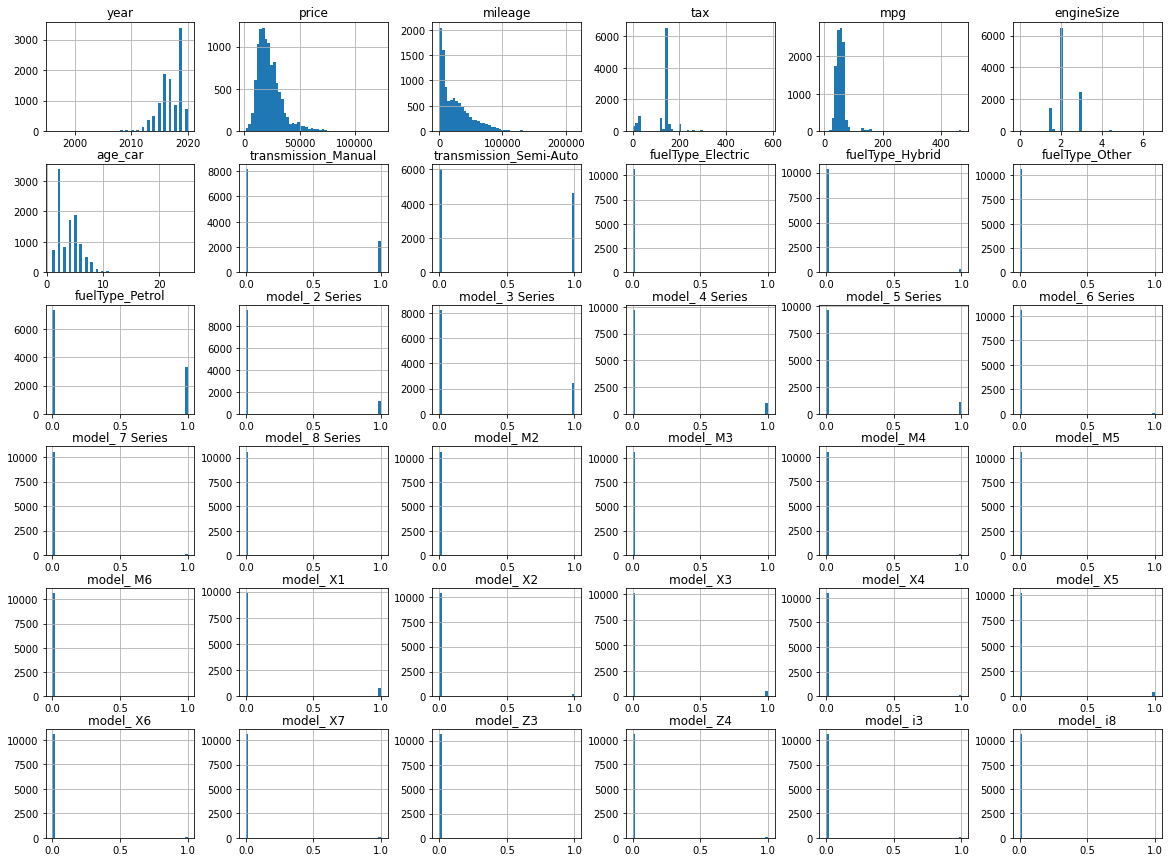

In [ ]:
#Melihat distribusi data
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

# **MODEL DEVELOPMENT**

In [ ]:
#Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
#Model 1 KNN
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_train)

In [ ]:
# Model 2 Random Forest
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)          

In [ ]:
#Model 3 Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# **EVALUATION MODEL**

In [ ]:
#Tampilkan perbandingan evaluasi model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
 
mse

,train,test
KNN,51215.2,63930.4
RF,1782.13,5762.38
Boosting,31346.3,30563.9


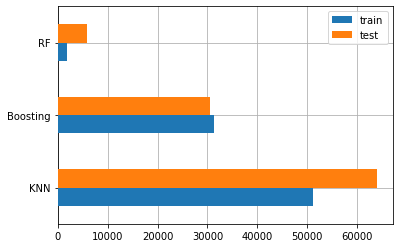

In [ ]:
#Visualisasi evaluasi model
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
#Uji Model
prediksi = x_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4086,32991,22358.5,33655.0,22193.3
7648,9490,14302.5,11951.3,16359.9
4786,18727,21656.2,20307.0,20357.5
7015,23789,29892.5,24363.4,26627.1
8479,12237,10658.2,11325.3,11460.1
7174,13000,17540.5,13992.6,17171.4
4210,27495,13472.4,24448.6,15665.6
5749,22750,23486.5,23011.9,26510.6
987,13995,22345.4,17094.8,20633.3
10488,10850,12677.1,10875.5,14380.9


In [ ]:
#Uji Validitas untuk membuktikan bahwa model RF adalah yang terbaik.
from sklearn.model_selection import cross_val_score
 
# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(RF, x, y, cv=10)
scores

array([0.95135106, 0.95522385, 0.90860339, 0.85977508, 0.92991307,
       0.93092638, 0.93858655, 0.96422653, 0.95565727, 0.9338672 ])